# Standard MNIST Analysis

This notebook explores the different algorithms that can be applied to the dataset MNIST

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from keras.datasets import mnist
import tensorflow as tf

config = {
    "batch": 32,
    'epochs': 10
}

2023-04-16 14:43:45.698616: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# 0. Load MNIST dataset

Use Keras package to download MNIST dataset, and plot a peak fo this dataset

In [8]:
# Loading the dataset from Keras
# (X_train, y_train), (X_test, y_test) = mnist.load_data()

# Load from CSV - Train
raw_data = pd.read_csv("../input/digit-recognizer/train.csv")
X_train = raw_data.drop('label', axis=1).values / 255.
X_train = np.reshape(X_train, (len(X_train), 28, 28))
y_train = raw_data['label'].values
dataset_train = tf.data.Dataset.from_tensor_slices((X_train, y_train))

# Load from CSV - Test
raw_data = pd.read_csv("../input/digit-recognizer/test.csv")
X_test = raw_data.values / 255.
X_test = np.reshape(X_test, (len(X_test), 28, 28))
dataset_test = tf.data.Dataset.from_tensor_slices(X_test)

dataset_train = dataset_train.batch(config['batch']).prefetch(1)
dataset_test = dataset_test.batch(config['batch']).prefetch(1)

In [9]:
# Understand the size of this dataset
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))

X_train: (42000, 28, 28)
Y_train: (42000,)
X_test:  (28000, 28, 28)


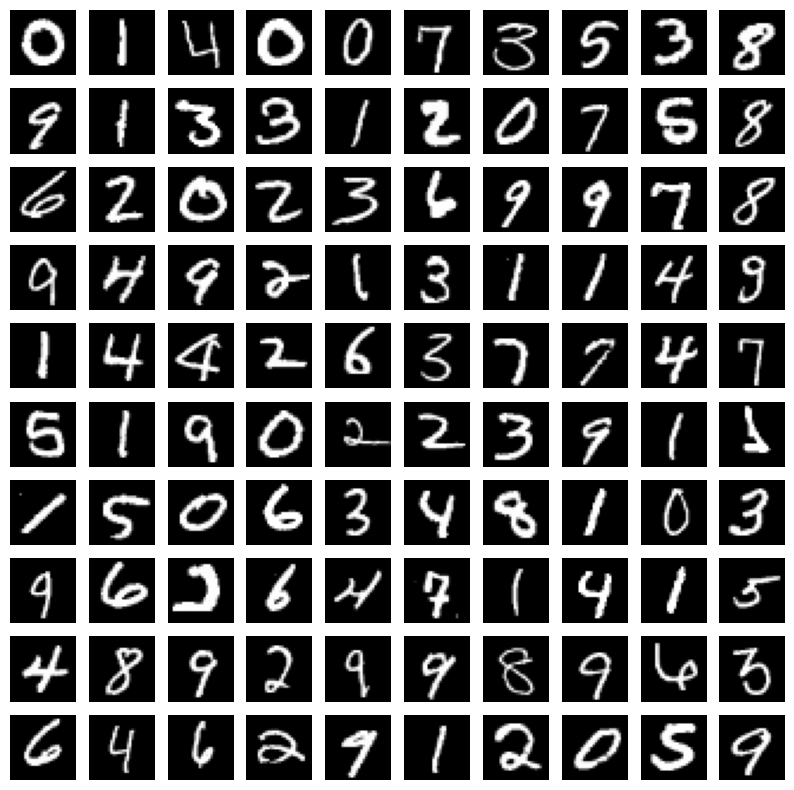

In [10]:
# Plot a sample of this dataset
plt.figure(figsize=(10,10))
for i in range(1,101):
    plt.subplot(10, 10, i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.axis('off')

plt.show()

Text(-3.9305555555555554, 0.5, 'Label Count')

<Figure size 2000x500 with 0 Axes>

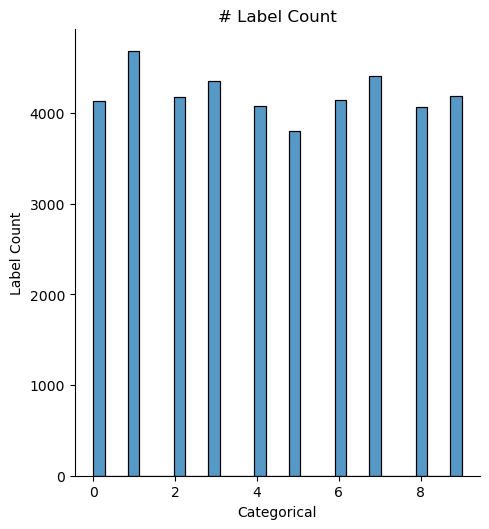

In [11]:
plt.figure(figsize=(20, 5))
sns.displot(y_train)
plt.title("# Label Count")
plt.xlabel("Categorical")
plt.ylabel("Label Count")

# 1. Create the CNN model

In this case, we will create a 2 stage CNN model, with 2 additional dense layers at the end. 

In [12]:
# Create the 2D CNN
SimpleCNN_model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape = (28, 28, 1)),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
SimpleCNN_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [13]:
# Compile the model 
# Use sparse categorial cross-entropy
SimpleCNN_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy'])

# Fit the model
SimpleCNN_model.fit(dataset_train, 
                    epochs=config['epochs'], batch_size=config['batch'])

Epoch 1/10


2023-04-16 14:45:09.938556: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [42000]
	 [[{{node Placeholder/_1}}]]


1313/1313 [==============================] - 16s 12ms/step - loss: 0.1550 - accuracy: 0.9526
Epoch 2/10
1313/1313 [==============================] - 18s 14ms/step - loss: 0.0490 - accuracy: 0.9850
Epoch 3/10
1313/1313 [==============================] - 19s 14ms/step - loss: 0.0310 - accuracy: 0.9906
Epoch 4/10
1313/1313 [==============================] - 19s 15ms/step - loss: 0.0213 - accuracy: 0.9935
Epoch 5/10
1313/1313 [==============================] - 20s 16ms/step - loss: 0.0154 - accuracy: 0.9951
Epoch 6/10
1313/1313 [==============================] - 20s 16ms/step - loss: 0.0120 - accuracy: 0.9964
Epoch 7/10
1313/1313 [==============================] - 20s 16ms/step - loss: 0.0112 - accuracy: 0.9962
Epoch 8/10
1313/1313 [==============================] - 20s 15ms/step - loss: 0.0083 - accuracy: 0.9971
Epoch 9/10
1313/1313 [==============================] - 22s 17ms/step - loss: 0.0088 - accuracy: 0.9970
Epoch 10/10
1313/1313 [==============================] - 21s 16ms/step - lo

In [26]:
# Predict the output with the CNN model
y_test_results = np.argmax(SimpleCNN_model.predict(dataset_test), axis=1)

# Create DataFrame with results
pd.DataFrame({
    "ImageId": [x+1 for x in list(range(len(y_test_results)))],
    "Label": y_test_results
    }).to_csv("../submission/digit_mnist_result.csv", index=False)

875/875 [==============================] - 6s 7ms/step
